# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=25)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=25)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(weather_key)
print(city)

Number of cities in the list: 24
f844ac39b6b1bdb398c522bcd361711b
san quintin


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#query_url = url + "q=" + city + "&appid=" + weather_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    city_url = url + "q=" + city + "&appid=" + weather_api_key

    # Create endpoint URL with each city
    city_url = requests.get(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_min"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | langsa
Processing Record 3 of Set 1 | la palma
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | nizwa
Processing Record 9 of Set 1 | pindi gheb
Processing Record 10 of Set 1 | oranjemund
Processing Record 11 of Set 1 | paita
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | hit
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | bintulu
Processing Record 19 of Set 1 | biloela
Processing Record 20 of Set 1 | khatanga
Processing Record 21 of Set 1 | antrim
Processing Record 22 of Set 1 | 

In [4]:
city_lat

30.4833

In [5]:
#city_weather = city_url.json() 
#city_lat = city_weather["timezone"]
print(city_data)

[{'City': 'langsa', 'Lat': 4.4683, 'Lng': 97.9683, 'Max Temp': 296.18, 'Humidity': 296.18, 'Cloudiness': 100, 'Wind Speed': 1.28, 'Country': 'ID', 'Date': 1679611961}, {'City': 'la palma', 'Lat': 33.8464, 'Lng': -118.0467, 'Max Temp': 290.53, 'Humidity': 286.55, 'Cloudiness': 75, 'Wind Speed': 6.17, 'Country': 'US', 'Date': 1679611961}, {'City': 'atuona', 'Lat': -9.8, 'Lng': -139.0333, 'Max Temp': 300.26, 'Humidity': 300.26, 'Cloudiness': 16, 'Wind Speed': 5.18, 'Country': 'PF', 'Date': 1679611961}, {'City': 'hilo', 'Lat': 19.7297, 'Lng': -155.09, 'Max Temp': 300.53, 'Humidity': 297.1, 'Cloudiness': 20, 'Wind Speed': 6.69, 'Country': 'US', 'Date': 1679611957}, {'City': 'port elizabeth', 'Lat': -33.918, 'Lng': 25.5701, 'Max Temp': 293.88, 'Humidity': 293.88, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'ZA', 'Date': 1679611962}, {'City': 'nizwa', 'Lat': 22.9333, 'Lng': 57.5333, 'Max Temp': 291.46, 'Humidity': 291.46, 'Cloudiness': 0, 'Wind Speed': 1.1, 'Country': 'OM', 'Date': 1679

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          22
Lat           22
Lng           22
Max Temp      22
Humidity      22
Cloudiness    22
Wind Speed    22
Country       22
Date          22
dtype: int64

In [7]:
# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,langsa,4.4683,97.9683,296.18,296.18,100,1.28,ID,1679611961
1,la palma,33.8464,-118.0467,290.53,286.55,75,6.17,US,1679611961
2,atuona,-9.8000,-139.0333,300.26,300.26,16,5.18,PF,1679611961
3,hilo,19.7297,-155.0900,300.53,297.10,20,6.69,US,1679611957
4,port elizabeth,-33.9180,25.5701,293.88,293.88,100,0.89,ZA,1679611962
5,nizwa,22.9333,57.5333,291.46,291.46,0,1.10,OM,1679611962
6,pindi gheb,33.2402,72.2661,289.03,289.03,100,2.17,PK,1679611962
7,oranjemund,-28.5500,16.4333,289.69,289.69,0,5.16,NA,1679611963
8,paita,-5.0892,-81.1144,300.34,300.34,44,4.24,PE,1679611963
9,kapaa,22.0752,-159.3190,299.53,297.33,20,5.14,US,1679611963


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tasiilaq,65.6145,-37.6368,260.24,260.24,0,2.90,GL,1679535533
1,bluff,-46.6000,168.3333,289.71,289.71,45,3.70,NZ,1679535534
2,doha,25.2867,51.5333,293.14,290.32,0,3.09,QA,1679535534
3,te anau,-45.4167,167.7167,288.34,288.34,29,0.70,NZ,1679535535
4,waingapu,-9.6567,120.2641,301.54,301.54,100,1.20,ID,1679535535


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

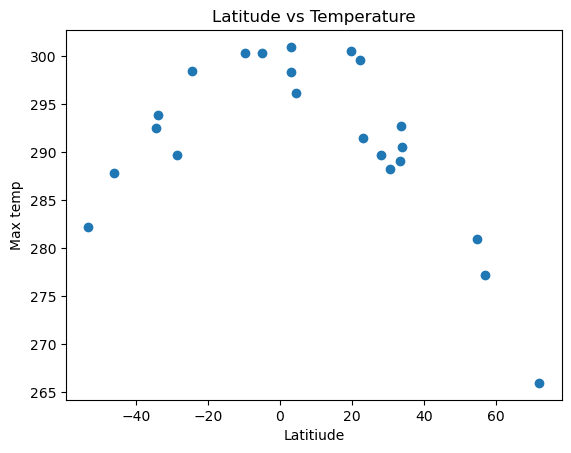

In [9]:
# Build scatter plot for latitude vs. temperature

lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]


plt.title('Latitude vs Temperature')
plt.xlabel('Latitiude')
plt.ylabel('Max temp')
plt.scatter(lat,temp)



# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

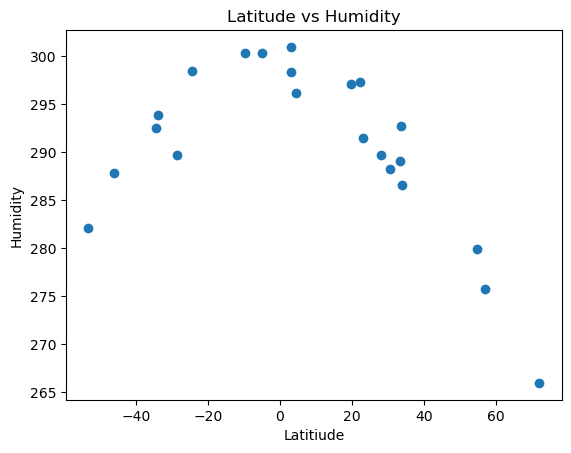

In [10]:
# Build the scatter plots for latitude vs. humidity

humidity = city_data_df["Humidity"]
plt.title('Latitude vs Humidity')
plt.xlabel('Latitiude')
plt.ylabel('Humidity')
plt.scatter(lat,humidity)


# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

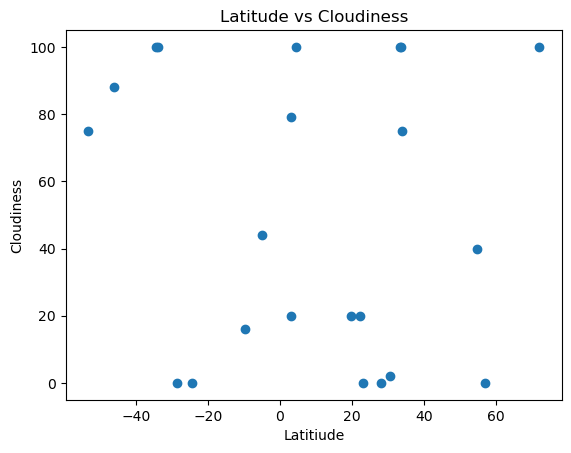

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudy = city_data_df["Cloudiness"]
plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitiude')
plt.ylabel('Cloudiness')
plt.scatter(lat,cloudy)

# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

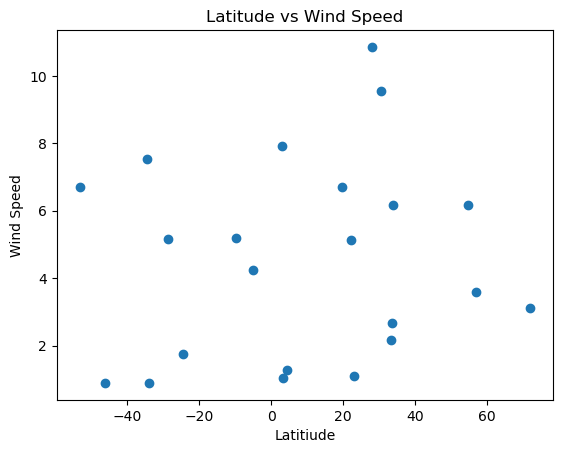

In [12]:
# Build the scatter plots for latitude vs. wind speed


wind = city_data_df["Wind Speed"]
plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitiude')
plt.ylabel('Wind Speed')
plt.scatter(lat,wind)

# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,260.24,260.24,0,2.90,GL,1679535533
2,doha,25.2867,51.5333,293.14,290.32,0,3.09,QA,1679535534
5,mahibadhoo,3.7833,72.9667,300.76,300.76,100,1.44,MV,1679535535
6,udachnyy,66.4167,112.4000,266.18,266.18,78,9.59,RU,1679535536
7,chokurdakh,70.6333,147.9167,247.69,247.69,76,2.62,RU,1679535536


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bluff,-46.6000,168.3333,289.71,289.71,45,3.70,NZ,1679535534
3,te anau,-45.4167,167.7167,288.34,288.34,29,0.70,NZ,1679535535
4,waingapu,-9.6567,120.2641,301.54,301.54,100,1.20,ID,1679535535
10,caucaia,-3.7361,-38.6531,301.12,299.28,40,2.06,BR,1679535537
11,hermanus,-34.4187,19.2345,295.26,295.26,99,12.14,ZA,1679535070


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.9062205214116775


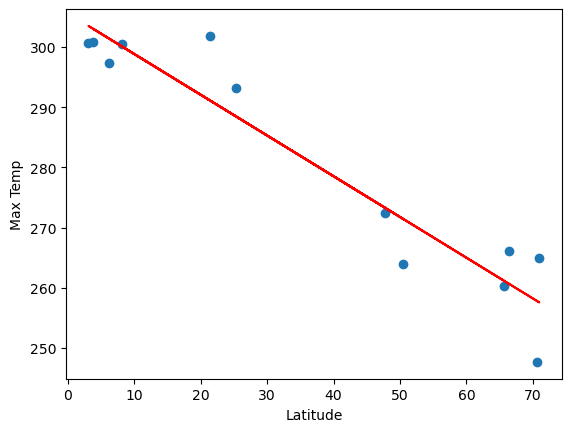

In [35]:
# Linear regression on Northern Hemisphere

nlat = northern_hemi_df["Lat"]
ntemp = northern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ntemp)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat,ntemp)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

R squared: 0.9363556882846731


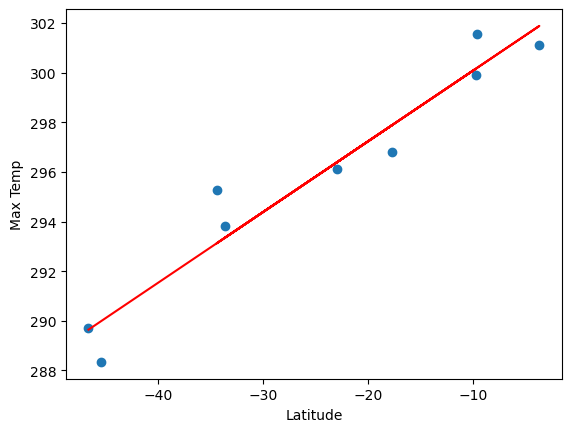

In [36]:
# Linear regression on Southern Hemisphere
slat = southern_hemi_df["Lat"]
stemp = southern_hemi_df["Max Temp"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, stemp)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat,stemp)

plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

In [ ]:
#The two graphs show an opposite effect in r value.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.9214685199163133


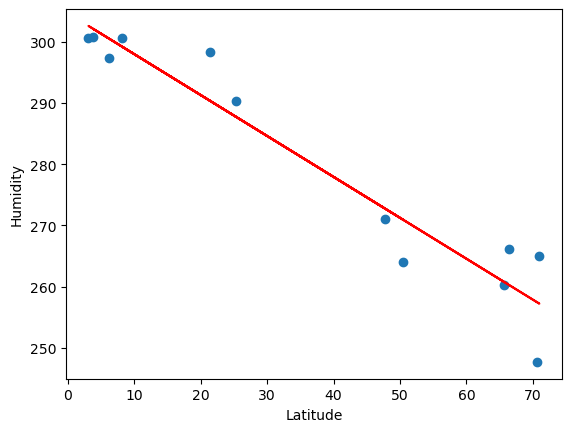

In [37]:
# Northern Hemisphere

nhum = northern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nhum)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat,nhum)

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

R squared: 0.8980548247705775


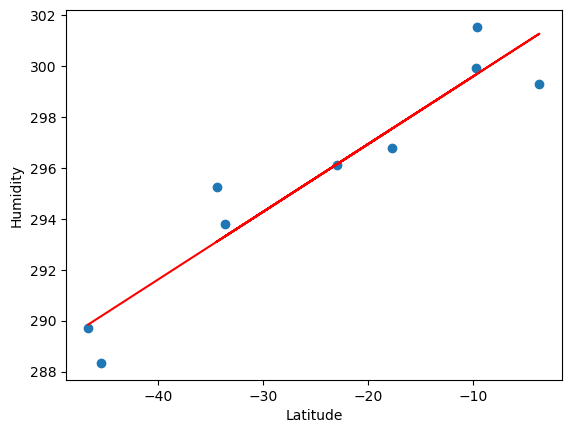

In [38]:
# Southern Hemisphere

shum = southern_hemi_df["Humidity"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, shum)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat,shum)

plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.021388642592711626


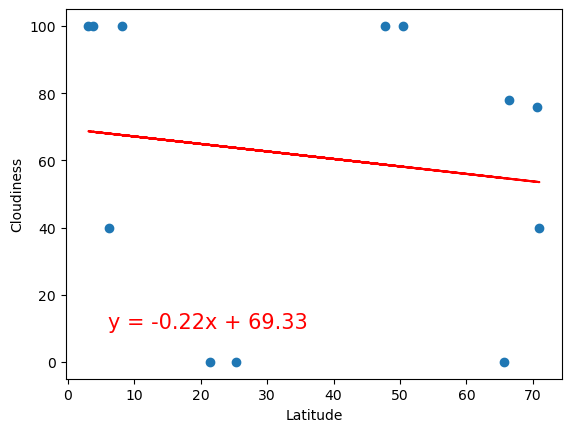

In [39]:
# Northern Hemisphere
ncloud = northern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, ncloud)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat,ncloud)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

R squared: 0.03455405903672505


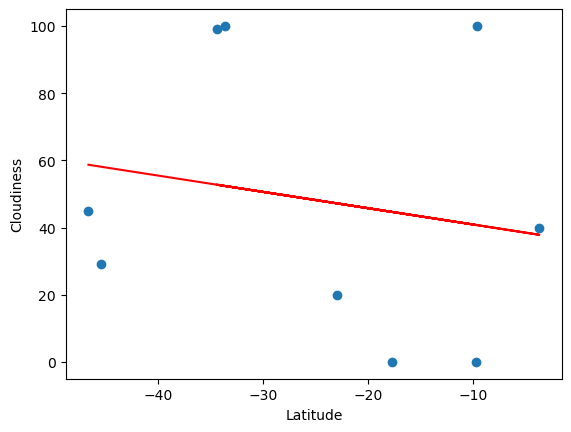

In [40]:
# Southern Hemisphere
scloud = southern_hemi_df["Cloudiness"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, scloud)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat,scloud)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.08437176206802195


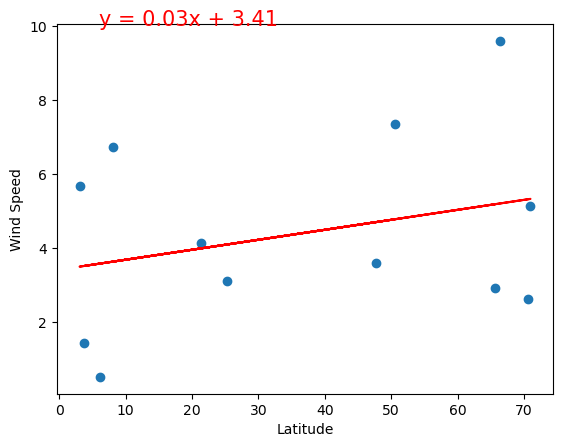

In [41]:
# Northern Hemisphere
nwind = northern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(nlat, nwind)
regress_values = nlat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nlat,nwind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(nlat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

R squared: 0.08066295743479523


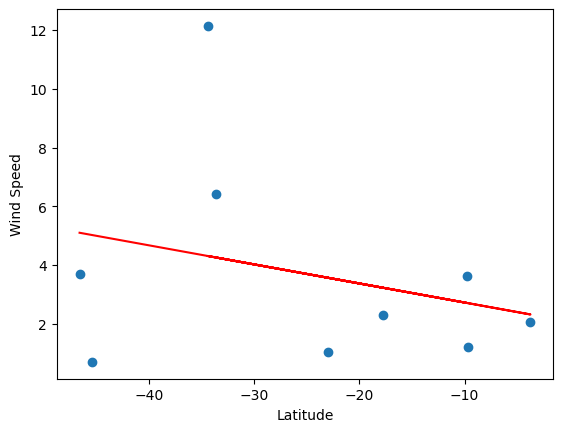

In [42]:
# Southern Hemisphere
swind = southern_hemi_df["Wind Speed"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(slat, swind)
regress_values = slat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(slat,swind)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"R squared: {rvalue**2}")

# Plot regression line
plt.plot(slat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE